# Sessions table analysis

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Numeric-data" data-toc-modified-id="Numeric-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Numeric data</a></span><ul class="toc-item"><li><span><a href="#Summary-statistics" data-toc-modified-id="Summary-statistics-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Summary statistics</a></span></li><li><span><a href="#Normal-distribution-evaluation" data-toc-modified-id="Normal-distribution-evaluation-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Normal distribution evaluation</a></span></li><li><span><a href="#Distribution-evaluation" data-toc-modified-id="Distribution-evaluation-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Distribution evaluation</a></span></li><li><span><a href="#Outliers-detection" data-toc-modified-id="Outliers-detection-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Outliers detection</a></span></li></ul></li><li><span><a href="#Categorical-data" data-toc-modified-id="Categorical-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Categorical data</a></span></li></ul></div>

## Introduction

In this document there will be statistical analysis of Exercises table. 
Exercises table has 21 variables (columns) and 1563 records. 
For the analysis below libraries will be used:

* pandas
* numpy
* statistics
* matplotlib.pyplot
* seaborn
* pingouin
* distfit

Below there are information and glimpse of this dataset. 

In [1]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pingouin as pg
import statsmodels.api as sm
import matplotlib as mpl
from scipy import stats
from distfit import distfit

sessions = pd.read_csv('C:/Users/admin/Desktop/mhunters/sessions.csv', on_bad_lines='skip', low_memory=False)

pd.options.display.float_format = '{:.2f}'.format

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["image.cmap"] = "Pastel2"

C:\Users\admin\anaconda\envs\mhunters\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1563 entries, 0 to 1562
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              1563 non-null   int64  
 1   level           0 non-null      float64
 2   order           1476 non-null   float64
 3   session_type    706 non-null    float64
 4   time_duration   750 non-null    float64
 5   reps            11 non-null     float64
 6   created_at      1563 non-null   object 
 7   updated_at      1563 non-null   object 
 8   strength        777 non-null    float64
 9   endurance       777 non-null    float64
 10  technique       777 non-null    float64
 11  flexibility     777 non-null    float64
 12  intensity       777 non-null    float64
 13  code_name       848 non-null    object 
 14  name_en         1505 non-null   object 
 15  name_es         1436 non-null   object 
 16  description_en  1242 non-null   object 
 17  description_es  1362 non-null   o

In [3]:
sessions.head()

,id,level,order,session_type,time_duration,reps,created_at,updated_at,strength,endurance,...,flexibility,intensity,code_name,name_en,name_es,description_en,description_es,calories,warmup_id,cooldown_id
0,77,NaN,5.00,NaN,826.00,NaN,2020-11-26 10:41:00.640821,2021-06-23 10:13:54.329647,0.00,0.00,...,0.00,0.00,PH1-2-5,CPH,CPH,Do 7 rounds of the following exercise circuit....,Completa 7 vueltas del siguiente circuito de e...,137.00,NaN,NaN
1,105,NaN,3.00,NaN,1200.00,NaN,2020-11-26 10:58:58.331556,2021-06-23 10:13:46.288148,0.00,0.00,...,0.00,0.00,PH3-2-3,IRP,IRP,Do 2 rounds of the following exercise circuit....,Completa 2 vueltas del siguiente circuito de e...,316.00,NaN,NaN
2,75,NaN,3.00,NaN,720.00,NaN,2020-11-26 10:40:36.555534,2021-06-23 10:13:46.513456,0.00,0.00,...,0.00,0.00,PH1-2-3,IRP,IRP,Do 2 rounds of the following exercise circuit....,Completa 2 vueltas del siguiente circuito de e...,174.00,NaN,NaN
3,85,NaN,3.00,NaN,651.00,NaN,2020-11-26 10:46:58.741735,2021-06-23 10:13:46.899618,0.00,0.00,...,0.00,0.00,PH2-1-3,IR,IR,Do 4 rounds of the following exercise circuit ...,Completa 4 vueltas del siguiente circuito de e...,369.00,NaN,NaN
4,97,NaN,10.00,NaN,738.00,NaN,2020-11-26 10:51:40.586402,2021-06-23 10:14:12.610656,0.00,0.00,...,0.00,0.00,PH2-2-10,SR,SR,Do 4 sets of a descending pyramid of the exerc...,Completa 4 vueltas de una pirámide descendient...,236.00,NaN,NaN


In the data, there is a lot of missing values. Below there is a barplot with count of missing data.

In [15]:
num_null_counts = []
num_no_null_counts = []

for col in sessions.columns:
    num_null_counts.append(sessions[col].isnull().sum())
    num_no_null_counts.append(len(sessions[col]) - sessions[col].isnull().sum())

null_c = {
    'True': num_null_counts,
    'False': num_no_null_counts
}

null_counts = pd.DataFrame(null_c)
null_counts.set_index(sessions.columns, inplace = True)

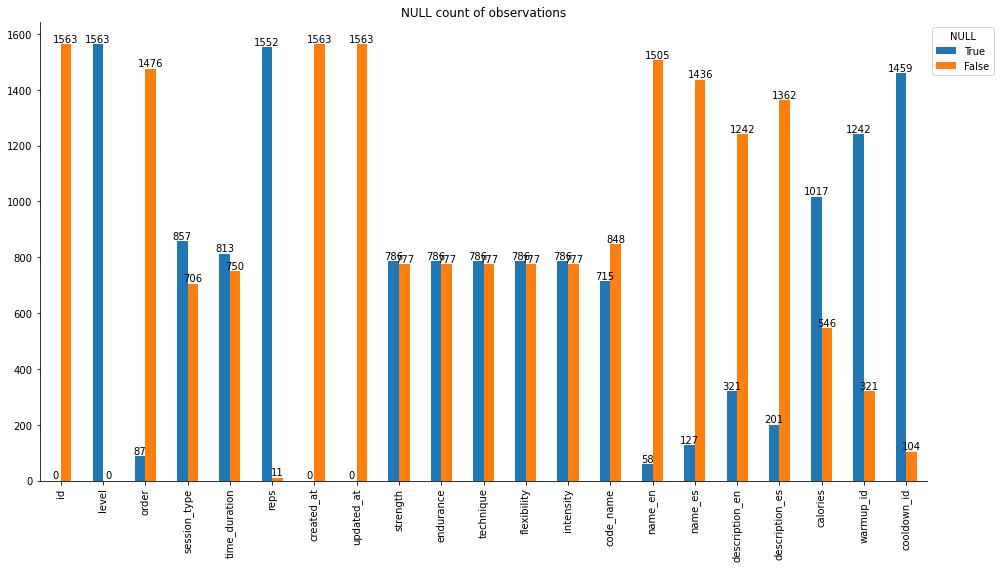

In [16]:
ax = null_counts.plot.bar(rot=1, figsize = (14,8), title = 'NULL count of observations')

ax.tick_params(axis='x', labelrotation = 90)

for c, col in zip(ax.containers, null_counts.columns):
    ax.bar_label(c, label_type='edge', labels=[f'{val}' for val in null_counts[col]])

ax.legend(title='NULL', bbox_to_anchor=(1, 1), loc='upper left')
    
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()

Columns

* *level*,
* *reps*,
* *created_at*, *updated_at*,
* *strength*,
* *endurance*,
* *technique*, 
* *flexibility*, 
* *intensity',
* *name_es*,
* *description_en*, 
* *description_es*
* *warmup_id*,
* *cooldown_id*

will be dropped, because they won't be important for the analysis. For the analysis variables taken into consideration are:

* *order* - number of order of session,
* *session_type* - type of session,
* *time_duration* - how long the session supposed to last,
* *code_name*,
* *name_en* - name in English,
* *calories* - how many calories supposed to be burned during the session.

The information and glimpse of reduced data are given below.

In [22]:
sessions2 = sessions.drop(['level', 'reps', 'created_at', 'updated_at', 'strength', 
                           'endurance', 'technique', 'flexibility', 'intensity',
                           'name_es','description_en', 'description_es', 'warmup_id', 'cooldown_id'], axis = 1)


In [23]:
sessions2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1563 entries, 0 to 1562
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1563 non-null   int64  
 1   order          1476 non-null   float64
 2   session_type   706 non-null    float64
 3   time_duration  750 non-null    float64
 4   code_name      848 non-null    object 
 5   name_en        1505 non-null   object 
 6   calories       546 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 85.6+ KB


In [24]:
sessions2.head()

,id,order,session_type,time_duration,code_name,name_en,calories
0,77,5.00,NaN,826.00,PH1-2-5,CPH,137.00
1,105,3.00,NaN,1200.00,PH3-2-3,IRP,316.00
2,75,3.00,NaN,720.00,PH1-2-3,IRP,174.00
3,85,3.00,NaN,651.00,PH2-1-3,IR,369.00
4,97,10.00,NaN,738.00,PH2-2-10,SR,236.00


There are 1563 observations, but none of the variables have all valid data. Not NULL data barchart is given below.

In [27]:
num_null_counts = []
num_no_null_counts = []

for col in sessions2.columns:
    num_null_counts.append(sessions2[col].isnull().sum())
    num_no_null_counts.append(len(sessions2[col]) - sessions2[col].isnull().sum())

null_c = {
    'True': num_null_counts,
    'False': num_no_null_counts
}

null_counts = pd.DataFrame(null_c)
null_counts.set_index(sessions2.columns, inplace = True)

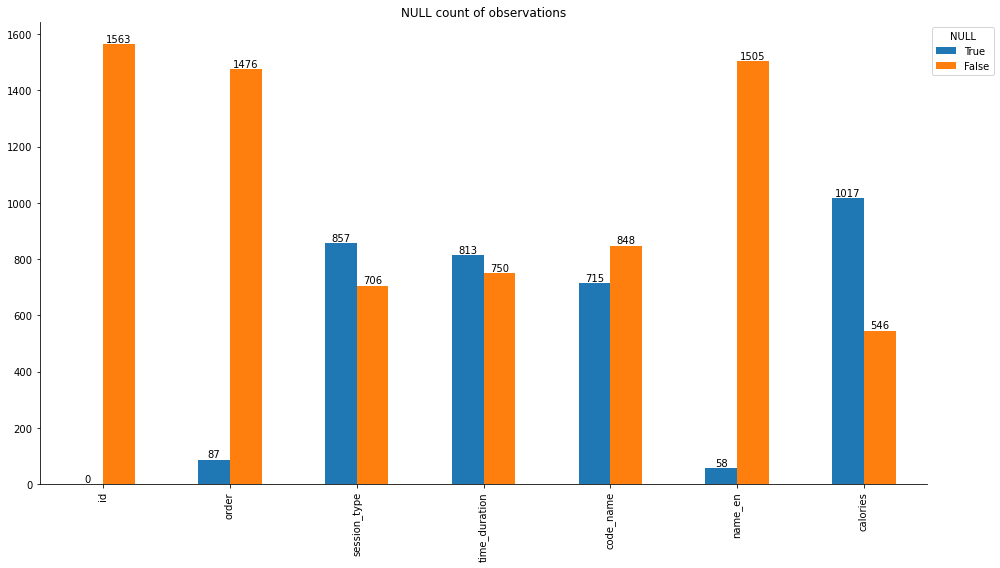

In [28]:
ax = null_counts.plot.bar(rot=1, figsize = (14,8), title = 'NULL count of observations')

ax.tick_params(axis='x', labelrotation = 90)

for c, col in zip(ax.containers, null_counts.columns):
    ax.bar_label(c, label_type='edge', labels=[f'{val}' for val in null_counts[col]])

ax.legend(title='NULL', bbox_to_anchor=(1, 1), loc='upper left')
    
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()

## Numeric data

Variables

* *time_duration*,
* *calories*

can be considered as numeric data.

### Summary statistics

Below there is summary statistics about this variable that contains mean, standard deviation, minimum, maximum, quartiles, variance, skewness, kurtosis and NULL count.

In [30]:
num_t = sessions2.loc[:, ['time_duration', 'calories']]
num_t_desc = num_t.describe()
num_t_desc = num_t_desc.transpose()
num_t_desc["var"] = num_t.var()
num_t_desc["skewness"] = num_t.skew()
num_t_desc["kurtosis"] = num_t.kurtosis()
num_t_desc["NULL count"] = num_t.isna().sum()
num_t_desc

,count,mean,std,min,25%,50%,75%,max,var,skewness,kurtosis,NULL count
time_duration,750.00,976.01,544.35,65.00,600.00,958.50,1240.00,3420.00,296317.62,1.07,2.28,813
calories,546.00,301.78,113.16,80.00,202.00,299.50,398.00,500.00,12806.20,-0.01,-1.11,1017


Mean value of supposed *time_duration* of session is 976 seconds (SD 544), median value is 958.5 seconds (IQR 600 - 1240) and the maximum length of session is 3420 seconds.
Mean value of *calories* that supposed to be burned in session is 302 calories (SD 113), median is 299.5 (IQR 202 - 398) and maximum value of planned burned calories is 500 calories.

### Normal distribution evaluation

In this section, the normal distribution evaluation will be done. For this purpose, there will be histogram, qqplot and Shapiro-Wilk test done. Below there are histograms.

Text(0.5, 0.98, 'Histogram for numeric variables')

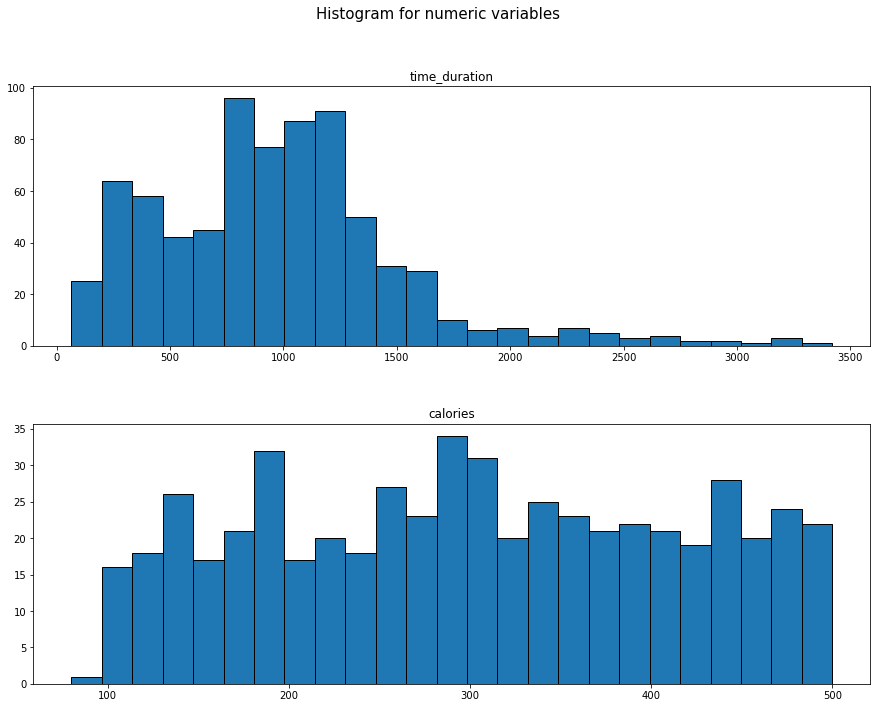

In [34]:
num_t.hist(layout=(2,1), grid = False, bins = 25, edgecolor='black', figsize=(15,11))
plt.suptitle('Histogram for numeric variables', fontsize = 15)

Below there are qqplots.

Text(0.5, 1.05, 'QQ plots for numeric variables')

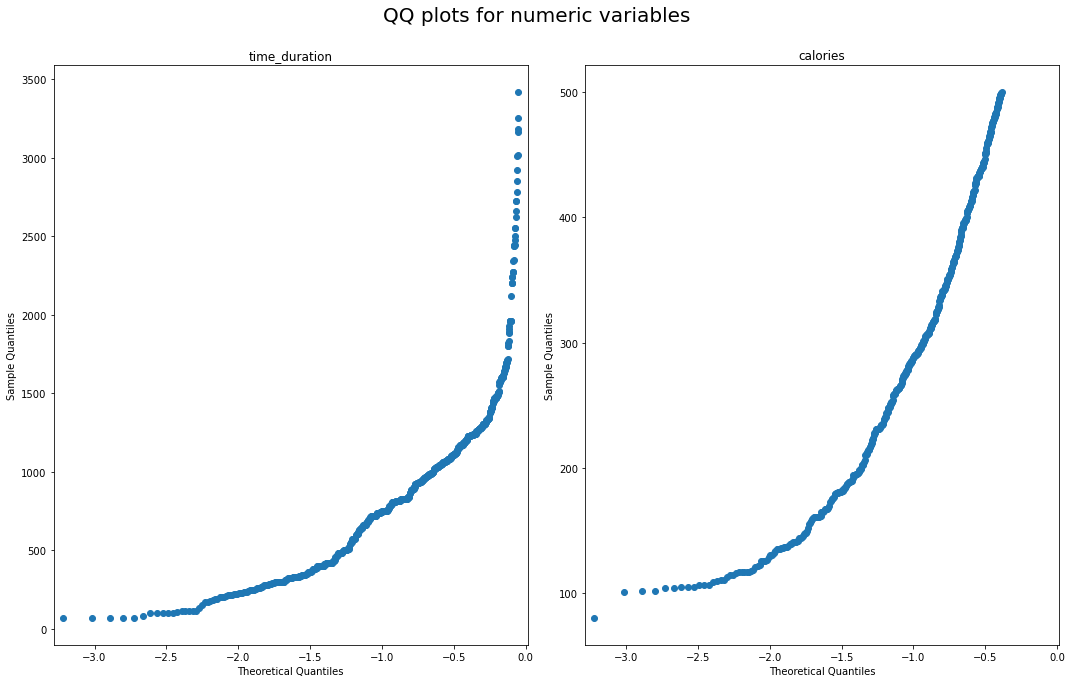

In [35]:
fig, axes = plt.subplots(ncols=2, nrows=1, sharex=True, figsize=(15,9))
for k, ax in zip(num_t.columns, np.ravel(axes)):

        sm.qqplot(num_t[k], line='s', ax=ax)
        ax.set_title(f'{k}')
plt.tight_layout()
plt.suptitle('QQ plots for numeric variables', fontsize = 20, y = 1.05)

And last, but not least, below there is the table with Shapiro-Wilk test statistics.

In [36]:
normal = pg.normality(num_t, method='shapiro').round(3)
normal.transpose()

,time_duration,calories
W,0.93,0.96
pval,0.00,0.00
normal,False,False


There is no normality in the data, histograms, qqlots and Shapiro-Wilk tests confirm it. Only for *calories* skewness shows normality, but other measures decline it. 

### Distribution evaluation

In this section, data distribution will be checked (or the closest one). The criterion of determination for best fit is RSS (residual sum of squares). The RSS describes the deviation predicted from actual empirical values of data. For this operation, NULL values from every tested variable have to be deleted.

* *time_duration* - the most fitting distribution is *burr* distribution (RSS = 0.00000097), then *Mielke* (RSS = 0.00000098), *dweibull* (RSS = 0.000001), *logistic* (RSS = 0.000001) and *t* (RSS = 0.000001).

[distfit] >fit..
[distfit] >transform..
[distfit] >[burr    ] [0.44 sec] [RSS: 9.6515e-07] [loc=-3.188 scale=1370.583]
[distfit] >[mielke  ] [0.22 sec] [RSS: 9.80318e-07] [loc=52.986 scale=1368.830]
[distfit] >[dweibull] [0.05 sec] [RSS: 1.00797e-06] [loc=951.268 scale=426.759]
[distfit] >[logistic] [0.0 sec] [RSS: 1.01044e-06] [loc=942.333 scale=292.072]
[distfit] >[t       ] [0.28 sec] [RSS: 1.02295e-06] [loc=934.496 scale=430.149]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot summary..


(<Figure size 864x504 with 1 Axes>,
 <AxesSubplot:title={'center':'Best fit: burr'}, xlabel='Distribution name', ylabel='RSS (lower is better)'>)

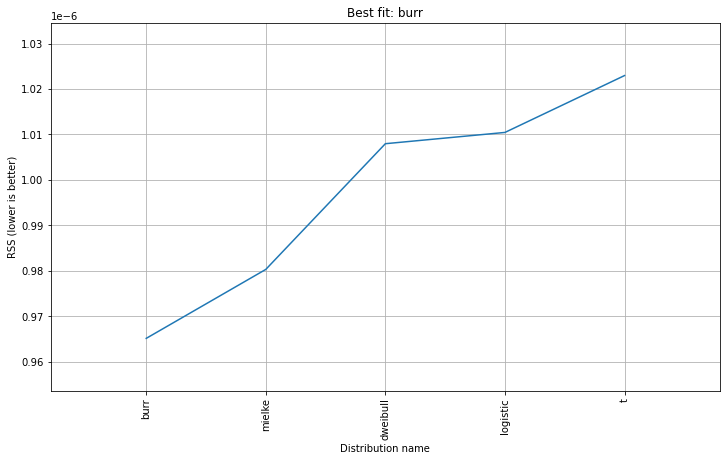

In [40]:
num_t2 = num_t['time_duration'].dropna()
dif_fed = num_t2.values
dist = distfit(distr = ['burr', 'mielke', 'dweibull', 'logistic', 't'])
dist.fit_transform(dif_fed)
#dist.summary # there can be also dist.plot() and it gives the plot of distribution 
dist.plot_summary(figsize = (12,7))

* *calories* - the most fitting distribution is *generalized normal* (RSS = 0.00003), then *hyper Gaussian* (RSS = 0.000031), *beta* (RSS = 0.000031), *johnsonb* (RSS = 0.000032) and *tukey lambda* (RSS = 0.000034).

[distfit] >fit..
[distfit] >transform..
[distfit] >[gennorm    ] [0.08 sec] [RSS: 3.03164e-05] [loc=298.801 scale=201.961]
[distfit] >[gausshyper ] [0.21 sec] [RSS: 3.13422e-05] [loc=79.531 scale=420.606]
[distfit] >[beta       ] [0.13 sec] [RSS: 3.14836e-05] [loc=79.546 scale=420.615]
[distfit] >[johnsonsb  ] [0.32 sec] [RSS: 3.19165e-05] [loc=77.524 scale=430.275]
[distfit] >[tukeylambda] [0.94 sec] [RSS: 3.39926e-05] [loc=290.765 scale=157.234]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot summary..


(<Figure size 864x504 with 1 Axes>,
 <AxesSubplot:title={'center':'Best fit: gennorm'}, xlabel='Distribution name', ylabel='RSS (lower is better)'>)

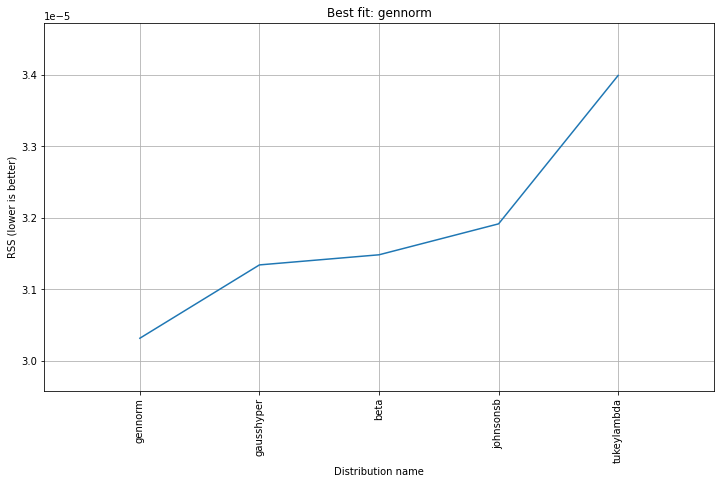

In [44]:
num_t2 = num_t['calories'].dropna()
dif_fed = num_t2.values
dist = distfit(distr = ['gennorm', 'gausshyper', 'beta', 'johnsonsb', 'tukeylambda'])
dist.fit_transform(dif_fed)
#dist.summary # there can be also dist.plot() and it gives the plot of distribution 
dist.plot_summary(figsize = (12,7))

### Outliers detection

The outliers detection will be done as soon as definition of an outlier will be specified.

## Categorical data

Variables considered as categorical are

* *order*,
* *session_type*,
* *code_name*,
* *name_en*.

In [45]:
def my_freq_table(data, var, sort = True, cumul_percent = False):
    myFreqTable = data[var].value_counts()
    myFreqTable = pd.DataFrame({var: myFreqTable.keys(), 'Frequency': myFreqTable.values})
    myFreqTable = myFreqTable.astype({'Frequency': 'int32'})
    
    if sort == True:
        myFreqTable = myFreqTable.sort_values(by=[var])
        myFreqTable = myFreqTable.reset_index(drop=True)
    
    myFreqTable['Percent'] = myFreqTable['Frequency']/myFreqTable['Frequency'].sum()*100
    
    sum_row1 = myFreqTable['Frequency'].sum()
    sum_row2 = myFreqTable['Percent'].sum()
    sum_row2 = sum_row2.round(2).astype('str') + '%'
    
    myFreqTable['Percent'] = myFreqTable['Percent'].round(2).astype('str') + '%'
    
    if cumul_percent == True:
        myFreqTable['Cumulative Percent'] = myFreqTable['Frequency'].cumsum() / myFreqTable['Frequency'].sum() * 100
        myFreqTable['Cumulative Percent'] = myFreqTable['Cumulative Percent'].round(2).astype('str') + '%'
        sum_row_c = '-'
    
    '''
    if valid_percent == True:
    
        myMissingCategory = [np.NaN]

        myFreqTable2 = myFreqTable
        isNonmisAr = np.array([])

        for i in data[var]:
            isNotMissing=1
            for j in myMissingCategory:
                if i==j:
                    isNotMissing=0
            isNonmisAr = np.append(isNonmisAr, [isNotMissing])
        
        validSum = sum(myFreqTable2['Frequency']*isNonmisAr)
        validPerc = myFreqTable2['Frequency']/validSum*isNonmisAr*100
        
        for i in range(len(validPerc)):
            if isNonmisAr[i]==0:
                validPerc[i]=np.nan
        
        myFreqTable2['Valid Percent'] = validPerc
        
        if cumul_percent == True:
            myFreqTable2['Cumulative Valid Percent'] = myFreqTable2['Valid Percent'].cumsum()
            
            sum_c_2 = '-'
            
            myFreqTable2['Cumulative Valid Percent'] = myFreqTable2['Cumulative Valid Percent'].round(2).astype('str') + '%'
        
        sum_valid_percent = myFreqTable2['Valid Percent'].sum()
        
        myFreqTable2['Valid Percent'] = myFreqTable2['Valid Percent'].round(2).astype('str') + '%'
        
        sum_valid_percent = sum_valid_percent.round(2).astype('str') + '%'
        
        #myFreqTable2 = myFreqTable2.set_index(var)
        
        # return(myFreqTable2)
    
       
    if (valid_percent == True) and (cumul_percent == True):
        new_rows = {'Frequency': sum_row1, 'Percent': sum_row2, 
                    'Cumulative Percent': sum_row_c, 
                    'Valid Percent': sum_valid_percent,
                    'Cumulative Valid Percent': sum_c_2}
        
    elif (valid_percent == False) and (cumul_percent == True):
        new_rows = {'Frequency': sum_row1, 'Percent': sum_row2, 
                    'Cumulative Percent': sum_row_c}
        
    elif (valid_percent == True) and (cumul_percent == False):
        new_rows = {'Frequency': sum_row1, 'Percent': sum_row2,
                    'Valid Percent': sum_valid_percent}
            
    else: new_rows = {'Frequency': sum_row1, 'Percent': sum_row2}
    
    if valid_percent == True:
        myFreqTable = myFreqTable2
    '''
    
    if cumul_percent == True:
        new_rows = {'Frequency': sum_row1, 'Percent': sum_row2, 
                    'Cumulative Percent': sum_row_c}
    else: new_rows = {'Frequency': sum_row1, 'Percent': sum_row2}
    
    myFreqTable = myFreqTable.append(new_rows, ignore_index=True)
    cats = data[var].cat.add_categories(['Total'])
    myFreqTable.set_index(cats.cat.categories, inplace = True)
    
    cols = myFreqTable.columns
    
    for col in cols:
        if col == var:
            myFreqTable = myFreqTable.drop(var, axis = 1)
    #myFreqTable.rename(index = {'NaN': 'Total'}, inplace = True)
    
    return(myFreqTable)
    

In [47]:
cols = ['order', 'session_type', 'code_name', 'name_en']

for col in cols:
    sessions2[col] = sessions2[col].astype('category')

In [49]:
order = my_freq_table(sessions2, 'order')
session_type = my_freq_table(sessions2, 'session_type')
code_name = my_freq_table(sessions2, 'code_name')
name_en = my_freq_table(sessions2, 'name_en')

* *session_type* - most of the sessions have session type 0 (506 sessions, 71.67%), second most frequent type of session is 11 (30 sessions, 4.25%) and the least frequent session type is type 12 (22 sessions, 3.12%). Below there is frequency table and barplot representing *session_type* variable.

In [59]:
session_type

,Frequency,Percent
0.0,506,71.67%
3.0,27,3.82%
4.0,25,3.54%
5.0,25,3.54%
6.0,24,3.4%
9.0,24,3.4%
10.0,23,3.26%
11.0,30,4.25%
12.0,22,3.12%
Total,706,100.0%


* *order* - most of the sessions have first order (490 sessions, 33%) and then second order (141 sessions, 0.6%). Below there is frequency table of order variable and barplot of top 10 sessions count. 

In [63]:
order.sort_values(by = 'Frequency', ascending = False).transpose()

,Total,1.0,2.0,3.0,4.0,5.0,6.0,8.0,9.0,10.0,...,59.0,60.0,58.0,57.0,56.0,55.0,53.0,52.0,51.0,54.0
Frequency,1476,490,141,78,76,73,52,52,52,52,...,1,1,1,1,1,1,1,1,1,1
Percent,100.0%,33.2%,9.55%,5.28%,5.15%,4.95%,3.52%,3.52%,3.52%,3.52%,...,0.07%,0.07%,0.07%,0.07%,0.07%,0.07%,0.07%,0.07%,0.07%,0.07%


* *code_name* - 

In [65]:
code_name.sort_values(by = 'Frequency', ascending = False).transpose()

,Total,W01_D01,W01_D03,W03_D01,W03_D02,W03_D03,W03_D04,W05_D01,W05_D02,W05_D03,...,PH2-2-8,PH2-2-9,PH2.1_V2,PH2.2_V2,PH2.3_V2,PH2.4_V2,PH2.5_V2,PH2.P2.10_V2,PH2.P2.1_V2,PH7-1-3
Frequency,848,3,3,3,3,3,3,3,3,3,...,1,1,1,1,1,1,1,1,1,1
Percent,100.0%,0.35%,0.35%,0.35%,0.35%,0.35%,0.35%,0.35%,0.35%,0.35%,...,0.12%,0.12%,0.12%,0.12%,0.12%,0.12%,0.12%,0.12%,0.12%,0.12%


In [58]:
order.transpose()

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,61.0,62.0,63.0,64.0,65.0,66.0,67.0,68.0,69.0,Total
Frequency,4,490,141,78,76,73,52,47,52,52,...,1,1,1,1,1,1,1,1,1,1476
Percent,0.27%,33.2%,9.55%,5.28%,5.15%,4.95%,3.52%,3.18%,3.52%,3.52%,...,0.07%,0.07%,0.07%,0.07%,0.07%,0.07%,0.07%,0.07%,0.07%,100.0%
